***Capstone 2: Supervised Learning

Summary: 

The objective of this task is to analyze the "UCI Credit Card" dataset to predict if the consumer will default on their next month payment. The variables analyzed consists of individuals balance amount in dollars, sex, education level, marriage status, age, and their payment status. 

Reserach Question: Which variables are most likely to result in individuals/partners defaulting on their payments?

Methods: Begin by implementing Exploratory Data Analysis, which consists of three phases: data cleaning, data exploration, and feature engineering. During data cleaning, raw data will be prepared for further analysis by handling missing values, outliers, etc. During data exploration, relationships are discovered between features and the target using statistical analysis and visualization techniques. During feature engineering, most useful features are selected to train the model. This example is a classificaiton problem, so, logistic regression, random forest, and KNN algorithms are used.

In [132]:
#Begin by importing the main libraries

import pandas as pd
import numpy as np
import seaborn as sns
import scipy.stats as stats
from scipy.stats import jarque_bera
from scipy.stats import normaltest
import matplotlib.pyplot as plt

from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn import ensemble
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, fbeta_score, classification_report

import time
import warnings
warnings.filterwarnings('ignore')

In [133]:
#Begin by loading the "UCI Credit Card" data.
data=pd.read_csv("UCI_Credit_Card.csv")

### Phase 1: Data Cleaning

In [134]:
#Getting information about the data
data.info()
data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ID                          30000 non-null  int64  
 1   LIMIT_BAL                   30000 non-null  float64
 2   SEX                         30000 non-null  int64  
 3   EDUCATION                   30000 non-null  int64  
 4   MARRIAGE                    30000 non-null  int64  
 5   AGE                         30000 non-null  int64  
 6   PAY_0                       30000 non-null  int64  
 7   PAY_2                       30000 non-null  int64  
 8   PAY_3                       30000 non-null  int64  
 9   PAY_4                       30000 non-null  int64  
 10  PAY_5                       30000 non-null  int64  
 11  PAY_6                       30000 non-null  int64  
 12  BILL_AMT1                   30000 non-null  float64
 13  BILL_AMT2                   300

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [135]:
data.shape #There are 30000 rows and 25 columns in the data

(30000, 25)

In [136]:
#Rename the default column for simplicity and drop ID column(unnececary)
data.rename(columns={'default.payment.next.month':"default"}, inplace=True)
data.drop("ID", axis=1, inplace=True)

In [137]:
#By inspecting the output above, I can see that there are no missing values. I will confirm this below as well. 
data.isnull().sum()

LIMIT_BAL    0
SEX          0
EDUCATION    0
MARRIAGE     0
AGE          0
PAY_0        0
PAY_2        0
PAY_3        0
PAY_4        0
PAY_5        0
PAY_6        0
BILL_AMT1    0
BILL_AMT2    0
BILL_AMT3    0
BILL_AMT4    0
BILL_AMT5    0
BILL_AMT6    0
PAY_AMT1     0
PAY_AMT2     0
PAY_AMT3     0
PAY_AMT4     0
PAY_AMT5     0
PAY_AMT6     0
default      0
dtype: int64

I can see that there are no missing values. Furthermore, all of the variables are numerical data types, even though, some are a categorical, such as, sex, education, and marriage. 

In [138]:
#Checking number of unique values in each category
data.nunique()

LIMIT_BAL       81
SEX              2
EDUCATION        7
MARRIAGE         4
AGE             56
PAY_0           11
PAY_2           11
PAY_3           11
PAY_4           11
PAY_5           10
PAY_6           10
BILL_AMT1    22723
BILL_AMT2    22346
BILL_AMT3    22026
BILL_AMT4    21548
BILL_AMT5    21010
BILL_AMT6    20604
PAY_AMT1      7943
PAY_AMT2      7899
PAY_AMT3      7518
PAY_AMT4      6937
PAY_AMT5      6897
PAY_AMT6      6939
default          2
dtype: int64

Variables with smaller number of unique values are likely classified as categorical.

In [139]:
#Checking unique values for marriage
data.MARRIAGE.unique()

array([1, 2, 3, 0])

In [140]:
#Checking education unique values
data.EDUCATION.unique()

array([2, 1, 3, 5, 4, 6, 0])

For Marriage variable: 3 and 0 are the same and for Education variable: 4, 5, and 6 are the same , so, combine them into one.

In [141]:
#For personal preference, I will represent values in catogorical variables as string types. This is not necessary. 
data.SEX.replace({1:'Male', 2:'Female'},inplace=True)
data.EDUCATION.replace({1:"Graduate",2:"University",3:"Highschool",4:"Other",5:"Other",6:"Other"},inplace=True)
data.MARRIAGE.replace({1:"Married",2:"Single",3:"Other",0:"Other"},inplace=True)
data.default.replace({1:"Yes",0:"No"}, inplace=True)

In [142]:
#Checking unique values for PAY
data.PAY_0.unique()

array([ 2, -1,  0, -2,  1,  3,  4,  8,  7,  5,  6])

In [143]:
#Combine -2 and -1 and represent them as 0.
data.PAY_0.replace({-2:0,-1:0}, inplace=True)
data.PAY_2.replace({-2:0,-1:0}, inplace=True)
data.PAY_3.replace({-2:0,-1:0}, inplace=True)
data.PAY_4.replace({-2:0,-1:0}, inplace=True)
data.PAY_5.replace({-2:0,-1:0}, inplace=True)
data.PAY_6.replace({-2:0,-1:0}, inplace=True)

In [144]:
#Double checking if data is modified correctly.
data.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default
0,20000.0,Female,University,Married,24,2,2,0,0,0,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,Yes
1,120000.0,Female,University,Single,26,0,2,0,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,Yes
2,90000.0,Female,University,Single,34,0,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,No
3,50000.0,Female,University,Married,37,0,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,No
4,50000.0,Male,University,Married,57,0,0,0,0,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,No


### Phase 2: Data Exploration

In [145]:
#Checking descrtiptive statistics of each feature
data.describe()

,LIMIT_BAL,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.00000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000
mean,167484.322667,35.485500,0.356767,0.320033,0.304067,0.258767,0.22150,0.226567,51223.330900,49179.075167,4.701315e+04,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567
std,129747.661567,9.217904,0.760594,0.801727,0.790589,0.761113,0.71772,0.715438,73635.860576,71173.768783,6.934939e+04,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775
min,10000.000000,21.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,-165580.000000,-69777.000000,-1.572640e+05,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000
25%,50000.000000,28.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,3558.750000,2984.750000,2.666250e+03,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000
50%,140000.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,22381.500000,21200.000000,2.008850e+04,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000
75%,240000.000000,41.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,67091.000000,64006.250000,6.016475e+04,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000
max,1000000.000000,79.000000,8.000000,8.000000,8.000000,8.000000,8.00000,8.000000,964511.000000,983931.000000,1.664089e+06,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000


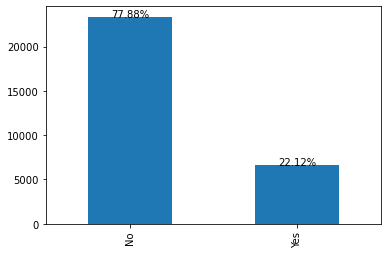

In [146]:
#Comparing percentage of defaults to non-defaults
data["default"].value_counts().plot.bar()

total=len(data['default'])
not_def = len(data[data['default']=='No'])/total *100
yes_def = len(data[data['default']=="Yes"])/total *100

plt.text(x=0, y=len(data[data['default']=='No']),s=str("%.2f"%not_def+'%'),horizontalalignment='center')
plt.text(x=1, y=len(data[data['default']=="Yes"]),s=str("%.2f"%yes_def+'%'), horizontalalignment='center')

plt.show()

Individuals or partners have 22.12% chance of defaulting. 

In [147]:
#Bivariate analysis of columns Sex, Education, and Marriage with default column

#Lets analyze the observation count of all value pairs using crosstab
count_SEX=pd.crosstab(data.SEX, data.default)
count_EDUCATION=pd.crosstab(data.EDUCATION, data.default)
count_MARRIAGE=pd.crosstab(data.MARRIAGE, data.default)
print(count_SEX,"\n")
print(count_EDUCATION,"\n")
print(count_MARRIAGE)

default     No   Yes
SEX                 
Female   14349  3763
Male      9015  2873 

default        No   Yes
EDUCATION              
0              14     0
Graduate     8549  2036
Highschool   3680  1237
Other         421    33
University  10700  3330 

default      No   Yes
MARRIAGE             
Married   10453  3206
Other       288    89
Single    12623  3341


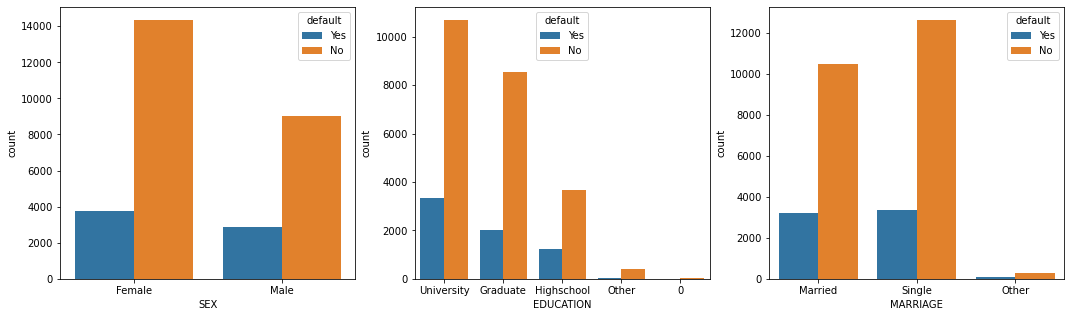

In [148]:
#Checking for relationships of categorical variables using visualization
plt.figure(figsize=(18,5))
plt.subplot(1,3,1)
sns.countplot(x='SEX', hue='default', data=data)
plt.subplot(1,3,2)
sns.countplot(x='EDUCATION', hue='default', data=data)
plt.subplot(1,3,3)
sns.countplot(x='MARRIAGE', hue='default', data=data)

plt.show()

On SEX variable, there are more females and female defaulters.
On EDUCATION variable, University degree holders default more, followed by Graduate holders.
On MARRIAGE variable, Singles tend to default more but there is not a lot of differences between. 

In [149]:
#Testing for statistical significance of the categorical variables with the default variable.
print(stats.chisquare(count_SEX, axis=None))
print(stats.chisquare(count_EDUCATION, axis=None))
print(stats.chisquare(count_MARRIAGE, axis=None))

Power_divergenceResult(statistic=11277.109866666666, pvalue=0.0)
Power_divergenceResult(statistic=42686.897333333334, pvalue=0.0)
Power_divergenceResult(statistic=28027.384000000002, pvalue=0.0)


There is a statistical significance between the categorical variables with the default variable. Therefore, I will use these variables as my features when training the model. 

<AxesSubplot:xlabel='age_bins'>

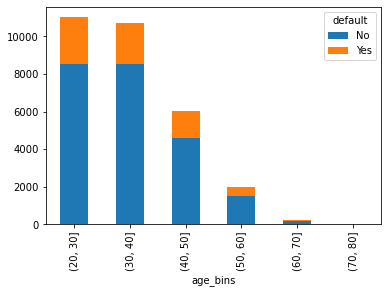

In [150]:
#Bivariate Analysis of LIMIT_BAL and AGE variables with the default variable.

data['age_bins']=pd.cut(data.AGE, bins=[20,30,40,50,60,70,80])
age_default=data.groupby(['age_bins','default']).AGE.count().unstack()

age_default.plot(kind='bar', stacked=True)

The amount of individuals defaulting is proportional to the total population of individuals in each age group but graph does indicate that individuals from age 20 to 40 are more likely to default.

<AxesSubplot:xlabel='default'>

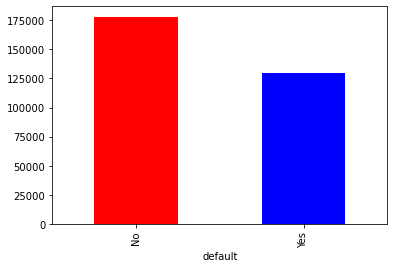

In [151]:
#Analyze LIMIT_BAL with default
data.groupby("default")['LIMIT_BAL'].mean().plot.bar(color=['red','blue'])


On average, Individuals/couples who received less NT dollars are likely to default more. 

<Figure size 1296x360 with 0 Axes>

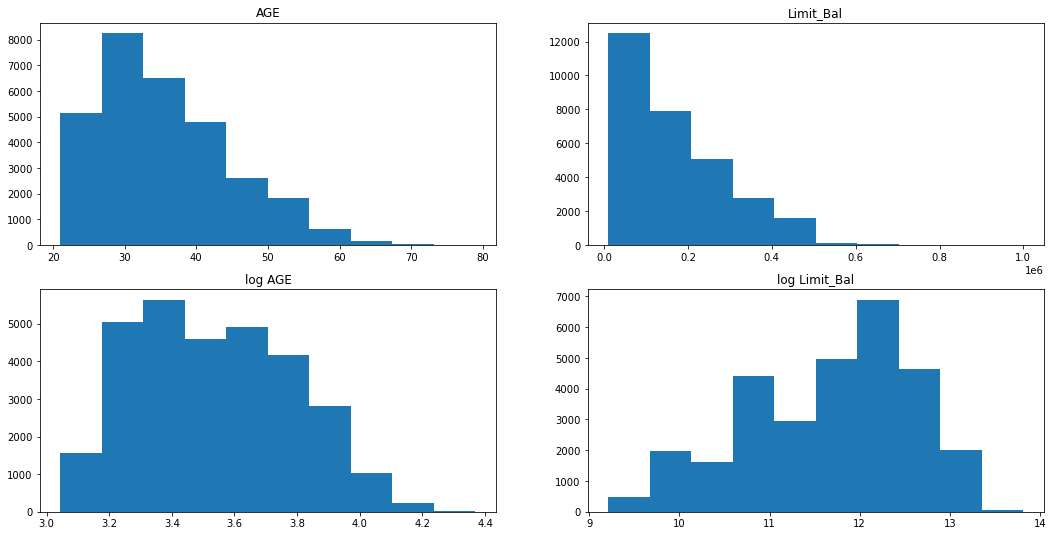

In [152]:
#Check the distribution of Limit_Bal and Age variables
plt.figure(figsize=(18,5))

#Check the distribution of Limit_Bal and Age variables
plt.figure(figsize=(18,9))
plt.subplot(2,2,1)
plt.hist((data.AGE))
plt.title("AGE")
plt.subplot(2,2,2)
plt.hist((data.LIMIT_BAL))
plt.title("Limit_Bal")

#Distributions after taking the log
plt.subplot(2,2,3)
plt.hist(np.log(data.AGE))
plt.title("log AGE")
plt.subplot(2,2,4)
plt.hist(np.log(data.LIMIT_BAL))
plt.title("log Limit_Bal")

#Replacing the better normally distributed data 
data['LIMIT_BAL']=np.log(data.LIMIT_BAL)
data['AGE']=np.log(data.AGE)

plt.show()

Created better normally distributed data of AGE and LIMIT_BAL by taking their log.

### Feature Engineering

In [153]:
data.head(20)

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default,age_bins
0,9.903488,Female,University,Married,3.178054,2,2,0,0,0,...,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,Yes,"(20, 30]"
1,11.695247,Female,University,Single,3.258097,0,2,0,0,0,...,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,Yes,"(20, 30]"
2,11.407565,Female,University,Single,3.526361,0,0,0,0,0,...,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,No,"(30, 40]"
3,10.819778,Female,University,Married,3.610918,0,0,0,0,0,...,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,No,"(30, 40]"
4,10.819778,Male,University,Married,4.043051,0,0,0,0,0,...,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,No,"(50, 60]"
5,10.819778,Male,Graduate,Single,3.610918,0,0,0,0,0,...,19619.0,20024.0,2500.0,1815.0,657.0,1000.0,1000.0,800.0,No,"(30, 40]"
6,13.122363,Male,Graduate,Single,3.367296,0,0,0,0,0,...,483003.0,473944.0,55000.0,40000.0,38000.0,20239.0,13750.0,13770.0,No,"(20, 30]"
7,11.512925,Female,University,Single,3.135494,0,0,0,0,0,...,-159.0,567.0,380.0,601.0,0.0,581.0,1687.0,1542.0,No,"(20, 30]"
8,11.849398,Female,Highschool,Married,3.332205,0,0,2,0,0,...,11793.0,3719.0,3329.0,0.0,432.0,1000.0,1000.0,1000.0,No,"(20, 30]"
9,9.903488,Male,Highschool,Single,3.555348,0,0,0,0,0,...,13007.0,13912.0,0.0,0.0,0.0,13007.0,1122.0,0.0,No,"(30, 40]"


<AxesSubplot:xlabel='default', ylabel='BILL_AMT6'>

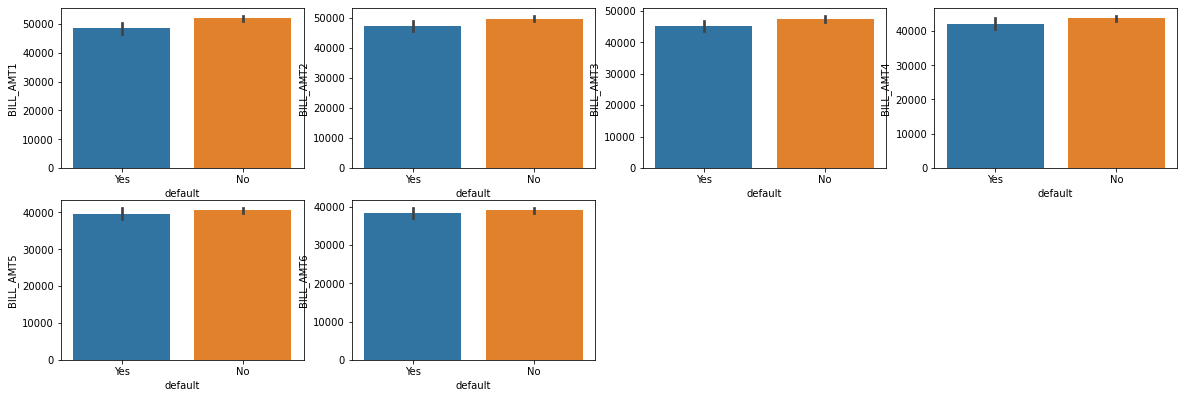

In [154]:
#Analyze Bill_AMT
plt.figure(figsize=(20,10))
plt.subplot(3,4,1)
sns.barplot(data.default, data.BILL_AMT1)
plt.subplot(3,4,2)
sns.barplot(data.default, data.BILL_AMT2)
plt.subplot(3,4,3)
sns.barplot(data.default, data.BILL_AMT3)
plt.subplot(3,4,4)
sns.barplot(data.default, data.BILL_AMT4)
plt.subplot(3,4,5)
sns.barplot(data.default, data.BILL_AMT5)
plt.subplot(3,4,6)
sns.barplot(data.default, data.BILL_AMT6)



<AxesSubplot:xlabel='default', ylabel='PAY_AMT6'>

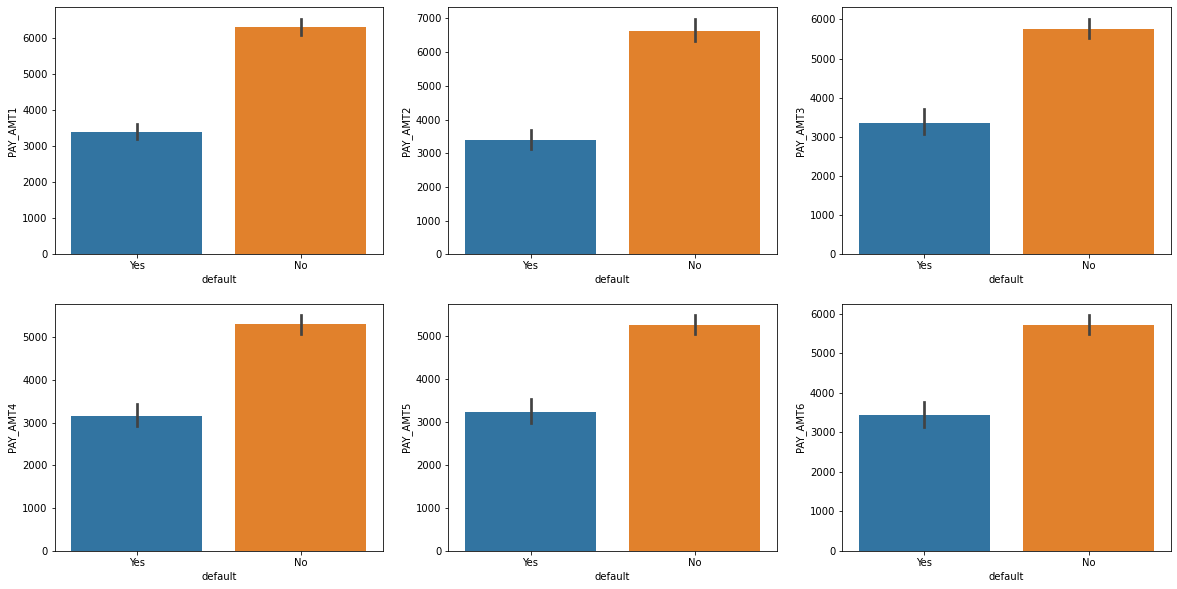

In [155]:
#Analyze Pay_AMT columns
plt.figure(figsize=(20,10))
plt.subplot(2,3,1)
sns.barplot(data.default, data.PAY_AMT1)

plt.subplot(2,3,2)
sns.barplot(data.default, data.PAY_AMT2)
plt.subplot(2,3,3)
sns.barplot(data.default, data.PAY_AMT3)
plt.subplot(2,3,4)
sns.barplot(data.default, data.PAY_AMT4)
plt.subplot(2,3,5)
sns.barplot(data.default, data.PAY_AMT5)
plt.subplot(2,3,6)
sns.barplot(data.default, data.PAY_AMT6)

Graph above indicates significant differences in PAY_AMT columns unlike in BILL_AMT columns. It seems that both groups are billed the similar amounts but defaulters pay less in average.  

<AxesSubplot:xlabel='PAY_6', ylabel='count'>

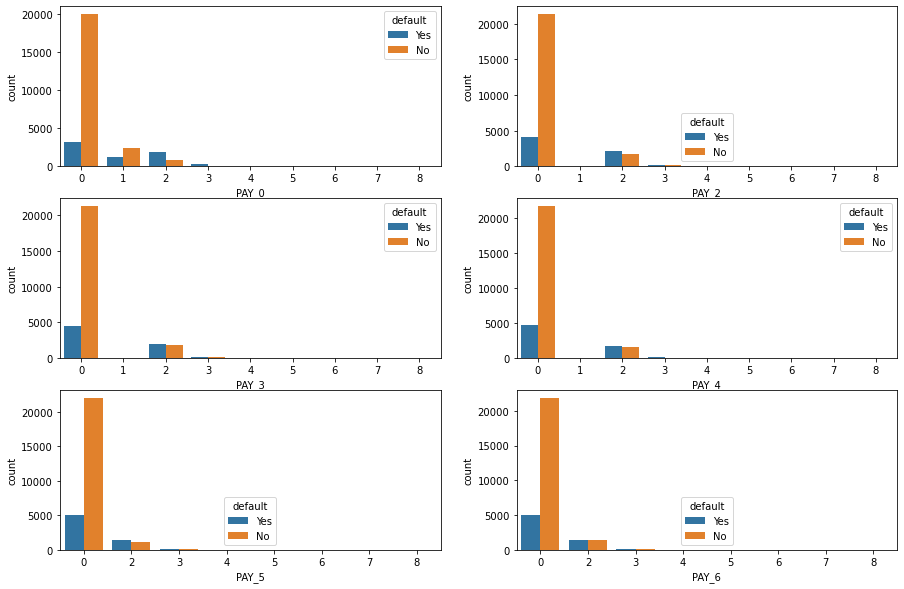

In [156]:
#Analyze the PAY columns
plt.figure(figsize=(15,10))
plt.subplot(3,2,1)
sns.countplot(x='PAY_0', hue='default', data=data)

plt.subplot(3,2,2)
sns.countplot(x='PAY_2', hue='default', data=data)

plt.subplot(3,2,3)
sns.countplot(x='PAY_3', hue='default', data=data)

plt.subplot(3,2,4)
sns.countplot(x='PAY_4', hue='default', data=data)

plt.subplot(3,2,5)
sns.countplot(x='PAY_5', hue='default', data=data)

plt.subplot(3,2,6)
sns.countplot(x='PAY_6', hue='default', data=data)

The graph above indicates that if individuals/partners will likely NOT default if payments are made ontime. However, if payments are late for 2-3 months, average numer of defaulters exceed the average number of non-defaulters. 

In [157]:
#Turn categorical variables back to numerical variables

data.SEX.replace({"Female":2 ,"Male":1}, inplace=True)
data.EDUCATION.replace({"Graduate":1,"University":2,"Highschool":3,"Other":4},inplace=True)
data.MARRIAGE.replace({"Married":1,"Single":2,"Other":3},inplace=True)
data.default.replace({"Yes":1,"No":0}, inplace=True)

In [158]:
#Looking into correlation between features and the target. Corr() can be used or heatmap. Heatmap provides a better visual.
#Look only to correlation between continuous and the target variables.  
abs(data.corr().loc[:,'default'].sort_values(ascending=False))

default      1.000000
PAY_0        0.396019
PAY_2        0.327093
PAY_3        0.286999
PAY_4        0.269055
PAY_5        0.260850
PAY_6        0.244437
EDUCATION    0.035197
AGE          0.007393
BILL_AMT6    0.005372
BILL_AMT5    0.006760
BILL_AMT4    0.010156
BILL_AMT3    0.014076
BILL_AMT2    0.014193
BILL_AMT1    0.019644
MARRIAGE     0.027575
SEX          0.039961
PAY_AMT6     0.053183
PAY_AMT5     0.055124
PAY_AMT3     0.056250
PAY_AMT4     0.056827
PAY_AMT2     0.058579
PAY_AMT1     0.072929
LIMIT_BAL    0.173571
Name: default, dtype: float64

<AxesSubplot:>

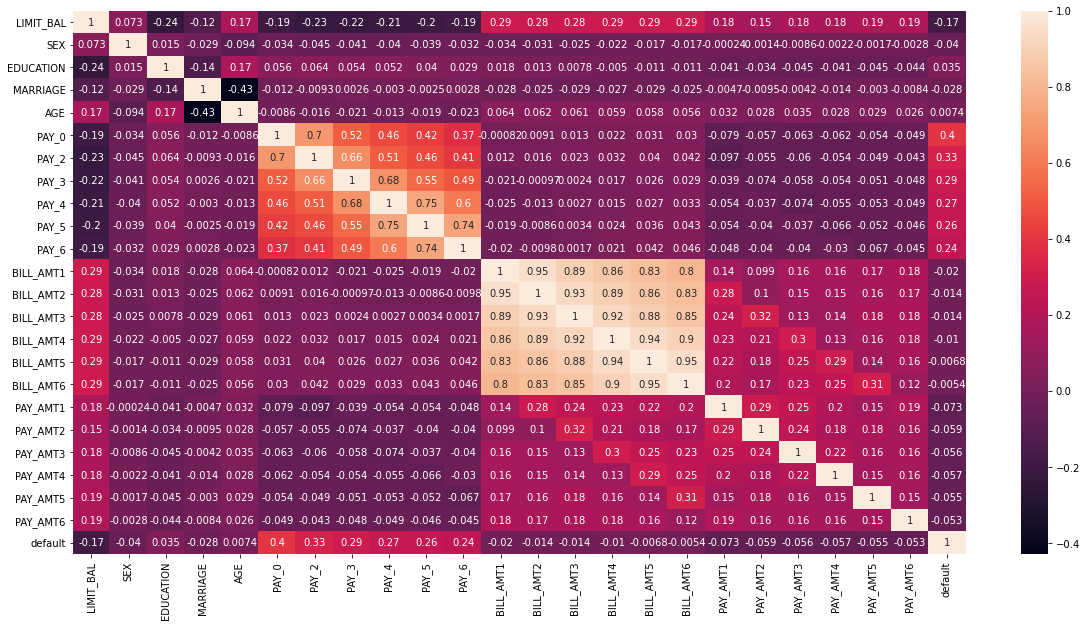

In [159]:
plt.figure(figsize=(20,10))
sns.heatmap(data.corr(), annot=True)

PAY_0 to PAY_6 variables are correlated more than others and will be selected as features.

### Train and Test Models

In [160]:
data.columns

Index(['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0', 'PAY_2',
       'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'default',
       'age_bins'],
      dtype='object')

In [161]:
#Based on the visual analysis and correlation, the features I will use include LIMIT_BAl, SEX, EDUCATION, MARRIAGE, AGE, PAY_0 to PAY_6, PAY_AMT1 to PAY_AMT6
# I also tested the model with only PAY_0 to PAY_6 features
#My target variable is default
X=data[['LIMIT_BAL','SEX','EDUCATION','MARRIAGE','AGE','PAY_0','PAY_2','PAY_3','PAY_4','PAY_5','PAY_6','PAY_AMT1','PAY_AMT2','PAY_AMT3','PAY_AMT4','PAY_AMT5','PAY_AMT6']]
Y=data.default


In [162]:
#Split the data to 80, 20.

X_train,X_test, y_train, y_test= train_test_split(X,Y,test_size=0.2, random_state=64)

In [163]:
#Using Logistic Regression

lr_model=LogisticRegression(solver='lbfgs')
lr_model.fit(X_train, y_train)

print("Train score: {:.2f}".format(lr_model.score(X_train,y_train)))
print("Test score: {:.2f}\n".format(lr_model.score(X_test, y_test)))

#predicting outputs using X_test
lr_pred=lr_model.predict(X_test)


Train score: 0.81
Test score: 0.80



The scores are not that different, overfitting is not indicated and regularization is not needed. 

In [164]:
lr1=accuracy_score(y_test, lr_pred)

confusion_report=confusion_matrix(y_test, lr_pred)
print(confusion_report)
accuracy_report=classification_report(y_test,lr_pred)
print(accuracy_report)

[[4473  177]
 [1000  350]]
              precision    recall  f1-score   support

           0       0.82      0.96      0.88      4650
           1       0.66      0.26      0.37      1350

    accuracy                           0.80      6000
   macro avg       0.74      0.61      0.63      6000
weighted avg       0.78      0.80      0.77      6000



In [165]:
#Lets use cross_val_score
clf=LogisticRegression(solver='lbfgs')
lr_cross_val=cross_val_score(clf, X_train, y_train, cv=5)
print("Logistic Regression average of 5 scores: ",lr_cross_val.mean())

Logistic Regression average of 5 scores:  0.804875


In [166]:
#Using Random Forest

rfc_model=ensemble.RandomForestClassifier(max_depth=4)
rfc_model.fit(X_train, y_train)

rfc_pred=rfc_model.predict(X_test)

print("Random forest train score: {:.2f}".format(rfc_model.score(X_train,y_train)))
print("Random forest test score: {:.2f}\n".format(rfc_model.score(X_test, y_test)))

#Using cross_val_score
rfc=ensemble.RandomForestClassifier(max_depth=4)
rfc_cross=cross_val_score(rfc, X_train, y_train, cv=5)
print("Random Forest average of 5 scores: ",rfc_cross.mean())

Random forest train score: 0.82
Random forest test score: 0.81

Random Forest average of 5 scores:  0.8159166666666667


In [167]:
rfc1=accuracy_score(y_test, rfc_pred)
rfc_confusion_report=confusion_matrix(y_test, rfc_pred)
print(rfc_confusion_report)
rfc_accuracy_report=classification_report(y_test,rfc_pred)
print(rfc_accuracy_report)

[[4477  173]
 [ 937  413]]
              precision    recall  f1-score   support

           0       0.83      0.96      0.89      4650
           1       0.70      0.31      0.43      1350

    accuracy                           0.81      6000
   macro avg       0.77      0.63      0.66      6000
weighted avg       0.80      0.81      0.79      6000



In [168]:
#Using KNN Model

knn_model=KNeighborsClassifier(n_neighbors=7, weights='distance', algorithm='brute')
knn_model.fit(X_train, y_train)

knn_pred=knn_model.predict(X_test)

In [169]:
print("KNN model train score: {:.2f}".format(knn_model.score(X_train,y_train)))
print("KNN model test score: {:.2f}\n".format(knn_model.score(X_test, knn_pred)))

#Using cross val
knn=KNeighborsClassifier(n_neighbors=7, weights='distance', algorithm='brute')
knn_cross=cross_val_score(knn, X_train, y_train, cv=5)
print("KNN average of 5 scores: ",knn_cross.mean())

KNN model train score: 1.00
KNN model test score: 1.00

KNN average of 5 scores:  0.7623333333333333


Underfitting is indicated.

In [170]:
knn1=accuracy_score(y_test, knn_pred)

knn_confusion_report=confusion_matrix(y_test, knn_pred)
print(knn_confusion_report)
knn_accuracy_report=classification_report(y_test, knn_pred)
print(knn_accuracy_report)

[[4304  346]
 [1078  272]]
              precision    recall  f1-score   support

           0       0.80      0.93      0.86      4650
           1       0.44      0.20      0.28      1350

    accuracy                           0.76      6000
   macro avg       0.62      0.56      0.57      6000
weighted avg       0.72      0.76      0.73      6000



**Training Same Models with only PAY_0 to PAY_6 features.

In [171]:
X=data[['PAY_0','PAY_2','PAY_3','PAY_4','PAY_5','PAY_6']]
Y=data.default

In [172]:
#Split the data to 80, 20.

X_train,X_test, y_train, y_test= train_test_split(X,Y,test_size=0.2, random_state=64)

In [173]:
#Using Logistic Regression

lr_model=LogisticRegression(solver='lbfgs', random_state=64)
lr_model.fit(X_train, y_train)

print("Train score: {:.2f}".format(lr_model.score(X_train,y_train)))
print("Test score: {:.2f}\n".format(lr_model.score(X_test, y_test)))

#predicting outputs using X_test
lr_pred=lr_model.predict(X_test)

Train score: 0.81
Test score: 0.82



In [174]:
lr2=accuracy_score(y_test, lr_pred)
confusion_report=confusion_matrix(y_test, lr_pred)
print(confusion_report)
accuracy_report=classification_report(y_test,lr_pred)
print(accuracy_report)

[[4483  167]
 [ 936  414]]
              precision    recall  f1-score   support

           0       0.83      0.96      0.89      4650
           1       0.71      0.31      0.43      1350

    accuracy                           0.82      6000
   macro avg       0.77      0.64      0.66      6000
weighted avg       0.80      0.82      0.79      6000



In [175]:
#Using Random Forest

rfc_model=ensemble.RandomForestClassifier(max_depth=4)
rfc_model.fit(X_train, y_train)

rfc_pred=rfc_model.predict(X_test)

print("Random forest train score: {:.2f}".format(rfc_model.score(X_train,y_train)))
print("Random forest test score: {:.2f}\n".format(rfc_model.score(X_test, y_test)))

#Using cross_val_score
rfc=ensemble.RandomForestClassifier(max_depth=4)
rfc_cross=cross_val_score(rfc, X_train, y_train, cv=5)
print("Random Forest averaage of 5 scores: ",rfc_cross.mean())

Random forest train score: 0.82
Random forest test score: 0.82

Random Forest averaage of 5 scores:  0.8207916666666668


In [176]:
rfc2=accuracy_score(y_test, rfc_pred)
rfc_confusion_report=confusion_matrix(y_test, rfc_pred)
print(rfc_confusion_report)
rfc_accuracy_report=classification_report(y_test,rfc_pred)
print(rfc_accuracy_report)

[[4426  224]
 [ 844  506]]
              precision    recall  f1-score   support

           0       0.84      0.95      0.89      4650
           1       0.69      0.37      0.49      1350

    accuracy                           0.82      6000
   macro avg       0.77      0.66      0.69      6000
weighted avg       0.81      0.82      0.80      6000



In [177]:
#Using KNN Model

knn_model=KNeighborsClassifier(n_neighbors=7, weights='distance', algorithm='brute')
knn_model.fit(X_train, y_train)

knn_pred=knn_model.predict(X_test)

print("KNN model train score: {:.2f}".format(knn_model.score(X_train,y_train)))
print("KNN model test score: {:.2f}\n".format(knn_model.score(X_test, knn_pred)))

#Using cross val
knn=KNeighborsClassifier(n_neighbors=7, weights='distance', algorithm='brute')
knn_cross=cross_val_score(knn, X_train, y_train, cv=5)
print("KNN average of 5 scores: ",knn_cross.mean())

KNN model train score: 0.31
KNN model test score: 1.00

KNN average of 5 scores:  0.8102500000000001


In [178]:
knn2=accuracy_score(y_test, knn_pred)
knn_confusion_report=confusion_matrix(y_test, knn_pred)
print(knn_confusion_report)
knn_accuracy_report=classification_report(y_test, knn_pred)
print(knn_accuracy_report)

[[ 918 3732]
 [ 477  873]]
              precision    recall  f1-score   support

           0       0.66      0.20      0.30      4650
           1       0.19      0.65      0.29      1350

    accuracy                           0.30      6000
   macro avg       0.42      0.42      0.30      6000
weighted avg       0.55      0.30      0.30      6000



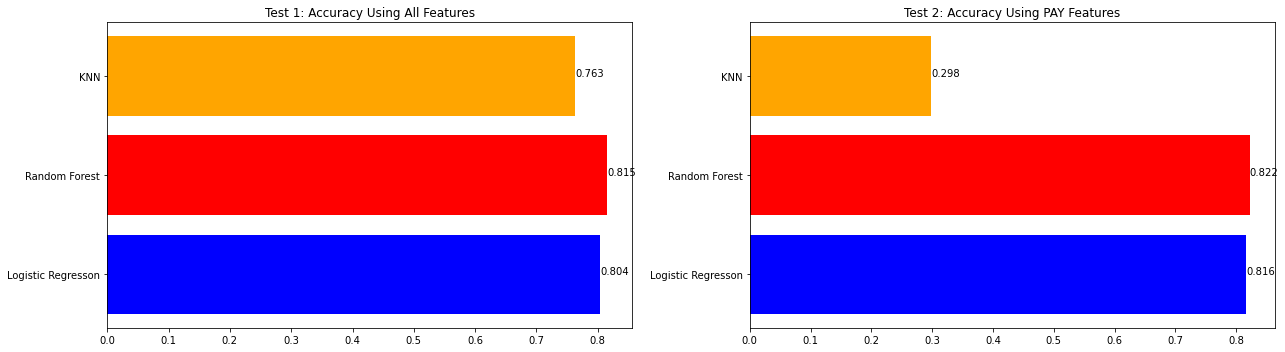

In [228]:
#Graphing accuracy scores
models=['Logistic Regresson','Random Forest','KNN']
accuracy1=[lr1, rfc1, knn1]
accuracy2=[lr2, rfc2, knn2]
plt.figure(figsize=(18,5))
plt.subplot(1,2,1)
plt.barh(models,accuracy1, color=['blue','red','orange'])
plt.title("Test 1: Accuracy Using All Features")
for i, val in enumerate(accuracy1):
    plt.text(val, i,
             str("%.3f"%val))
plt.subplot(1,2,2)
plt.barh(models,accuracy2,color=['blue','red','orange'])
plt.title("Test 2: Accuracy Using PAY Features")

for i, val in enumerate(accuracy2):
    plt.text(val, i,
             str("%.3f"%val))

plt.tight_layout()

Results:
    
Based on the visualization techniques of indiviudal feature and their relationship to the target variable, most useful features that leads to defaulting of individual/partners include: 'LIMIT_BAL','SEX','EDUCATION','MARRIAGE','AGE','PAY_0','PAY_2','PAY_3','PAY_4','PAY_5','PAY_6','PAY_AMT1','PAY_AMT2','PAY_AMT3','PAY_AMT4','PAY_AMT5', and 'PAY_AMT6'.

I used the above features to train my LogisticRegression, Random Forest, and KNN Classifier models. Comparing the accuracy  and the data gathered from confusion matrix, Random Forest model is better to predict the outcome value.

In order to improve the model, I chose the most correlated variables by analyzing correlation results. My second group of features to train the models only include: 'PAY_AMT1','PAY_AMT2','PAY_AMT3','PAY_AMT4','PAY_AMT5', and 'PAY_AMT6'. In this test, KNN model proved to be less effective. Random Forest model is a little better than Logistic Regression model on test 2 and its permormance improved by 1 point by only using the PAY_0 to PAY_6 features. 

The use of this model will highly benefit banks by allowing them to predict if a certain individual will default on their loan or not based on the features used above. This will lead banks to choose appropriate individuals to receive the loan and save money by reducing the number of loans given to individuals that are likely to default. 

This model will correctly predict 80% of the population. Even though this is good, it does not predict 100% and banks will sometimes will loan an individual who will likely to default. I believe including more features that would be more correlated with the target variable needs to be included in the data. Features can be credit score, individuals salary, and their total dept. 